# Using unsupervised learning for market segmentation in Microsoft Dynamics 365 for Finance and Operations

Unsupervised learning is a type of machine learning algorithm that is used for  discovering hidden patterns in data, when we don't have any labels. The most common unsupervised learning method is cluster analysis, that is used to group data according to similarity. Some practical applications of clustering include social network analysis, document classification, rideshare data analysis and customer or market segmentation. 
The most popular clustering algorithm is K-means. The goal of the k-means algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. 
Market o customer segmentation a key component in any business strategy, in the follow article I will show you how to deploy a market segmentation machine learning model for D365FO:  


## Import the relevant libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set the styles to Seaborn
sns.set()
# Import the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans

## Load the data

In [18]:
# Load the data
data = pd.read_csv ('MSD365FO.csv')

In [19]:
# Check what's inside
data

,Amount,Margin,Sales quantity
0,2.733641,3.712437,0.185244
1,1.517749,-0.014330,5.236811
2,1.205219,0.964502,0.176910
3,1.184554,0.959702,-0.105696
4,1.180562,0.922765,0.175859
5,1.146952,0.905474,0.213966
6,1.141608,0.976625,0.250131
7,1.118015,0.866784,0.102072
8,0.862538,0.859137,0.027880
9,0.830260,0.726356,0.115583


## Plot the data

Create a preliminary plot to see if you can spot something

Text(0,0.5,'Customer Annual Spending')

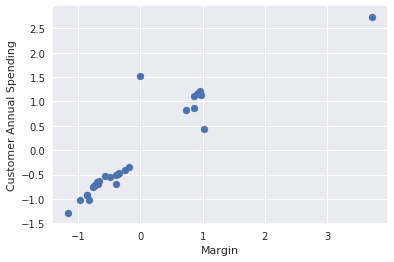

In [20]:
# We are creating a scatter plot of the two variables
plt.scatter(data['Margin'],data['Amount'])
# Name your axes 
plt.xlabel('Margin')
plt.ylabel('Customer Annual Spending')

## Select the features

In [21]:
# Select both features by creating a copy of the data variable
x = data.copy()

## Clustering

In [22]:
# Create an object (which we would call kmeans)
# The number in the brackets is K, or the number of clusters we are aiming for
kmeans = KMeans(4)
# Fit the data
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Clustering results

In [23]:
# Create a copy of the input data
clusters = x.copy()
# Take note of the predicted clusters 
clusters['cluster_pred']=kmeans.fit_predict(x)

Text(0,0.5,'Customer Annual Spending')

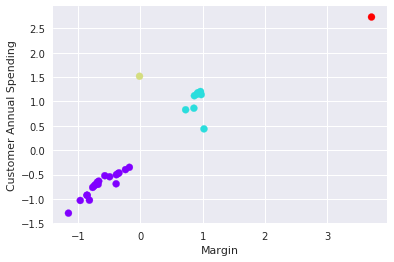

In [40]:
# Plot the data using the longitude and the latitude
# c (color) is an argument which could be coded with a variable 
# The variable in this case has values 0,1, indicating to plt.scatter, that there are two colors (0,1)
# All points in cluster 0 will be the same colour, all points in cluster 1 - another one, etc.
# cmap is the color map. Rainbow is a nice one, but you can check others here: https://matplotlib.org/users/colormaps.html
plt.scatter(clusters['Margin'],clusters['Amount'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Margin')
plt.ylabel('Customer Annual Spending')

## Standardize the variables

Let's standardize and check the new result

In [24]:
# Import a library which can do that easily
from sklearn import preprocessing
# Scale the inputs
# preprocessing.scale scales each variable (column in x) with respect to itself
# The new result is an array
x_scaled = preprocessing.scale(x)
x_scaled

array([[ 2.7336413 ,  3.71243714,  0.18524381],
       [ 1.5177494 , -0.01432959,  5.23681065],
       [ 1.20521861,  0.96450197,  0.17691042],
       [ 1.18455361,  0.9597016 , -0.10569641],
       [ 1.18056164,  0.92276488,  0.17585864],
       [ 1.14695239,  0.90547402,  0.21396566],
       [ 1.14160774,  0.97662463,  0.25013092],
       [ 1.11801456,  0.86678406,  0.1020718 ],
       [ 0.86253809,  0.85913673,  0.02788042],
       [ 0.83026029,  0.72635552,  0.1155832 ],
       [ 0.43766448,  1.021116  ,  0.1619427 ],
       [-0.35116547, -0.17718955, -0.28838357],
       [-0.39837679, -0.23997401, -0.30359401],
       [-0.4653244 , -0.3443167 , -0.30019594],
       [-0.48091492, -0.36068712, -0.28854538],
       [-0.50323655, -0.38671592, -0.29226709],
       [-0.52325292, -0.5723813 , -0.29590788],
       [-0.54507605, -0.49430261, -0.32147438],
       [-0.63506476, -0.6696422 , -0.34404733],
       [-0.65702345, -0.69248175, -0.32600515],
       [-0.68995387, -0.39030487, -0.284

## Take advantage of the Elbow method

In [25]:
# Createa an empty list
wcss =[]

# Create all possible cluster solutions with a loop
# We have chosen to get solutions from 1 to 9 clusters; you can ammend that if you wish
for i in range(1,10):
    # Clsuter solution with i clusters
    kmeans = KMeans(i)
    # Fit the STANDARDIZED data
    kmeans.fit(x_scaled)
    # Append the WCSS for the iteration
    wcss.append(kmeans.inertia_)
    
# Check the result
wcss

[90.00000000000001,
 37.91471787019073,
 12.78666145541763,
 3.054150837020807,
 1.5200378441989875,
 1.0549593784195077,
 0.6347399709515719,
 0.48317006000312507,
 0.33620318230873536]

Text(0,0.5,'WCSS')

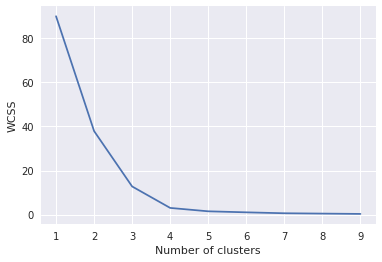

In [20]:
# Plot the number of clusters vs WCSS
plt.plot(range(1,10),wcss)
# Name your axes
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')